In [18]:
from random import choice
import matplotlib.pyplot as plt
from math import(atan2,erfc,erf,log10)
from numpy import (sin, cos, array, pi, sqrt,hsplit, argmin,arctan,arange,e)
from numpy.random import normal
import matplotlib

In [19]:
f = 1e9                 # sampling frequency ( 10 counts on sin)
F = 1e7                 # sin frequency ( 10 sin on bit)   
T = 1e-6                # time of bit
sigma = 10
n = 1000               # count of bits       

M1 = 10
M2 = 11

bits = [choice([1,0]) for i in range(n)]

In [20]:
quantity_of_counts_on_chip =  round((1/F)/(1/f))
quantity_of_chips_on_bit = int(T/(1/F))
quantity_of_counts_bit = quantity_of_chips_on_bit*quantity_of_counts_on_chip
N = int(quantity_of_chips_on_bit*n)     
quantity_of_counts_all = int(N*quantity_of_counts_on_chip)

counts_on_chip = [t*(1/f) for t in range(0,quantity_of_counts_on_chip)]         
counts_time = [t*(1/f) for t in range(0,quantity_of_counts_all)] 
counts_on_bit = [t*(1/f) for t in range(0,quantity_of_counts_bit)]


print('Количество отсчетов на чип:',quantity_of_counts_on_chip)
print('Количество чипов на бит: ',quantity_of_chips_on_bit )
print('Количество отсчетов на бит: ',quantity_of_chips_on_bit*quantity_of_counts_on_chip)
print('Общее количество чипов: ', N )
print('Общее количество отсчетов на все сообщение: ',quantity_of_counts_all )

#FSK.Опорные символы 
COS1 = [cos(M1*2*pi*F*t) for t in counts_on_bit] 
COS2 = [cos(M2*2*pi*F*t) for t in counts_on_bit]
COS1=array(COS1).ravel()
COS2=array(COS2).ravel()

Количество отсчетов на чип: 100
Количество чипов на бит:  10
Количество отсчетов на бит:  1000
Общее количество чипов:  10000
Общее количество отсчетов на все сообщение:  1000000


In [21]:
def drawGrphs(bits,new_bits):
    
    message = []
    for i in bits:
        if i==1:
            message+=[COS1]
        else:
            message+=[COS2]
    message=array(message).ravel()
    noise = normal(0,sigma,quantity_of_counts_all)
    message_noise = array(message + noise)
    
    matplotlib.rcParams['figure.figsize'] = 15, 10
    aa=plt.subplot(2,1,1) 
    plt.plot(counts_time,message,'green')
    bb=plt.subplot(2,1,2) 
    plt.plot(counts_time,message_noise,'red')
    #cc=plt.plot(counts_on_bit,COS1,'red')
    #plt.axis([9.9*1e-7 , 10.1*1e-7 ,-1, 1])
    #dd=plt.plot(counts_on_bit,COS2,'blue')


In [22]:
def modulatorFSK(sigma,bits):
    message = []
    for i in bits:
        if i==1:
            message+=[COS1]
        else:
            message+=[COS2]

    message=array(message).ravel()
    noise = normal(0,sigma,quantity_of_counts_all)
    message_noise = array(message + noise)
    return  message_noise


In [23]:
def deModulatorFSK(n,message_noise):
    arrived_bits = hsplit(message_noise,n) 
    correlation1 = 0
    correlation2 = 0
    new_bits = []

    for i in range(n): 
        correlation1 = (COS1*arrived_bits[i]).sum()
        correlation2 = (COS2*arrived_bits[i]).sum()
        #print(correlation)
        if correlation1 > correlation2:                                                 
            new_bits += [1]
        else:
            new_bits += [0]
            
    correlation1 = 0
    correlation2 = 0
    
    new_bits = array(new_bits)  
    return new_bits

In [24]:
message = modulatorFSK(sigma,bits)
new_bits = deModulatorFSK(n,message)
bits = array(bits).ravel()

In [25]:
#drawGrphs(bits,new_bits)

In [26]:
# Теоретическая и практическая вероятность ошибки
E = T/2
No = 2*sigma**2 / f
SN = E/No
ErrTheor = erfc(sqrt(SN/2))/2                      

PError = 0
for i in range(n):
    if bits[i] != new_bits[i]:
        PError += 1
PError /= n

print('Сигнал-шум:',10*log10(SN))
print('E:',E)
print('N0:',No)
print('Теоретическая вероятность ошибки',round(100*ErrTheor,1),'%')
print('Практическая вероятность ошибки:',PError*100,'%')

Сигнал-шум: 3.979400086720376
E: 5e-07
N0: 2e-07
Теоретическая вероятность ошибки 5.7 %
Практическая вероятность ошибки: 6.800000000000001 %


In [27]:
## Графическое представление

In [28]:
E = T/2              
arrSN = arange(-5,15,1)

In [29]:
#С помощью дополнительной функции ошибок erfc = 1 - erf нахождение теоретических значений Pошибки
arrErrThr = [erfc(sqrt(10**(SN/10))/2)/2 for SN in arrSN]  #  /2 т.к у нас SN = 2E/N ИЛИ по формуле ссылки,которую скинул Дима

In [30]:
#Расчет средней практической ошибки
quantity_for_medium = 100
arrErrPrt = []

for SN in arrSN:
    Pm = 0
    sig=sqrt((T*f)/(2*10**(SN/10)))   #!!!!
    print(sig)
    for i in range(quantity_for_medium):
        bits = [choice([1,0]) for i in range(n)]
        mes = modulatorFSK(sig ,bits)
        new_bits = deModulatorFSK(n ,mes)
        np_bits =  array(bits).ravel()
        
        for i in range(n):
            if np_bits[i] != new_bits[i]:
                Pm += 1
    
    Pm /= (quantity_for_medium*n)
    arrErrPrt += [Pm]

39.76353643835253
35.43928915419707
31.58529970547121
28.150427993736734
25.089095358284318
22.360679774997898
19.928976826775145
17.761719292909024
15.830148982673414
14.108635131604638
12.574334296829354
11.206887238456494
9.98814876483345
8.901946956877223
7.933868576533667
7.0710678118654755
6.302095820932435
5.616748812614791
5.005932648504533
4.461542169214011


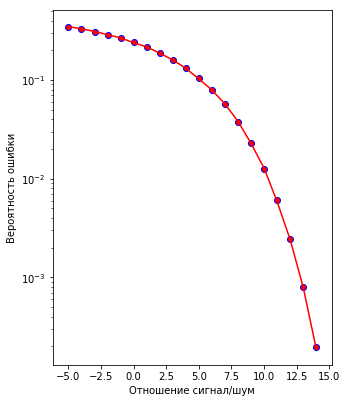

In [31]:
matplotlib.rcParams['figure.figsize'] = 5, 30
gr = plt.subplot(4,1,1)   
gr.set_xlabel('Отношение сигнал/шум')
gr.set_ylabel('Вероятность ошибки')
#Практика
plt.plot(arrSN,arrErrPrt,'red')
#Теория
plt.scatter(arrSN, arrErrThr, marker='o', c='r', edgecolor='b')
#gr.set_xscale('log')
gr.set_yscale('log')